In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sbn

In [2]:
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("testFeatures.csv")
#train_data.head()

In [3]:
#sbn.displot(train_data["ürün fiyatı"])

In [4]:
##train_data = train_data.sort_values("ürün fiyatı", ascending=False).iloc[2000:]
#sbn.displot(train_data["ürün fiyatı"])

In [5]:
train_data.tail(20)

,tarih,ürün,ürün besin değeri,ürün kategorisi,ürün fiyatı,ürün üretim yeri,market,şehir
227500,2020-12-01,Erik türleri,60,meyve,21.11,Yurt dışı,B,H
227501,2020-12-01,İncir,80,meyve,12.81,Yurt dışı,B,H
227502,2020-12-01,Karadut,93,meyve,16.61,Yurt dışı,B,H
227503,2020-12-01,Karpuz,24,meyve,19.51,Yurt dışı,B,H
227504,2020-12-01,Kavun,28,meyve,23.06,Yurt dışı,B,H
227505,2020-12-01,Kayısı,54,meyve,15.39,Yurt dışı,B,H
227506,2020-12-01,Kiraz,79,meyve,17.40,Yurt dışı,B,H
227507,2020-12-01,Limon,17,meyve,9.52,Yurt dışı,B,H
227508,2020-12-01,Mandalina,36,meyve,9.85,Yurt dışı,B,H
227509,2020-12-01,Muz,90,meyve,30.54,Yurt dışı,B,H


In [6]:
#encoder: Kategorik -> numerik
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [7]:
# ürün sayısal hale getirme
urunSayisal = le.fit_transform(train_data.iloc[:,1])

# üretim yerini sayısal hale getirme
uretimYeriSayisal = le.fit_transform(train_data.iloc[:,-3:-2])

#sehirleri sayısal hale getirme
ohe = preprocessing.OneHotEncoder()
sehirSayisal = ohe.fit_transform(train_data["şehir"].values.reshape(-1,1)).toarray()

#marketleri sayısal hale getirme
ohe = preprocessing.OneHotEncoder()
marketSayisal = ohe.fit_transform(train_data["market"].values.reshape(-1,1)).toarray()

#ürün kategorisini sayısal hale getirme
ohe = preprocessing.OneHotEncoder()
urunKategoriSayisal = ohe.fit_transform(train_data["ürün kategorisi"].values.reshape(-1,1)).toarray()


#tarihi sayısal hale getirme
train_data['tarih'] = pd.to_datetime(train_data['tarih'])
train_data["Yıl"] = train_data["tarih"].dt.year
train_data["Ay"] = train_data["tarih"].dt.month
train_data["Gün"] = train_data["tarih"].dt.day

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [8]:
#numpy dizileri dataframe donusumu
urunSayisal = pd.DataFrame(data = urunSayisal, index = range(227520), columns=["ürün"])
uretimYeriSayisal = pd.DataFrame(data = uretimYeriSayisal, index = range(227520), columns=["üYeri"])
sehirSayisal = pd.DataFrame(data = sehirSayisal, index = range(227520), columns=["sehirA","sehirB","sehirC","sehirD","sehirE","sehirF","sehirG","sehirH"])
marketSayisal = pd.DataFrame(data = marketSayisal, index = range(227520), columns=["marketB","marketC","marketM"])
urunKategoriSayisal = pd.DataFrame(data = urunKategoriSayisal, index = range(227520), columns=["et","kuruyemiş","meyve","sebze ve bakliyat", "süt ürünlei ve kahvaltılık", "tahıl ve ürünleri"])

In [9]:
#dataframe birlestirme islemi
b1= pd.concat([sehirSayisal, train_data.iloc[:,-3:]], axis=1)
b2= pd.concat([marketSayisal, b1], axis=1)
b3= pd.concat([uretimYeriSayisal, b2], axis=1)
b4 = pd.concat([train_data.iloc[:,2], b3], axis=1)
b5= pd.concat([urunSayisal, b4], axis=1)
numerikVeri= pd.concat([urunKategoriSayisal, b5], axis=1)
numerikVeri = numerikVeri.drop(["Gün"], axis=1)

In [10]:
# veri setindeki istenen fiyat listesi
y=train_data.iloc[:,4]

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
x = numerikVeri
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=0)


In [13]:
type(y_test)

pandas.core.series.Series

In [14]:
#scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [15]:
"""
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)
"""

x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)


In [16]:
import tensorflow as tf

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [18]:
model = Sequential()

model.add(Dense(512, activation="relu"))
model.add(Dense(512, activation="relu"))
model.add(Dense(256, activation="relu"))
model.add(Dense(64, activation="relu"))
model.add(Dense(32, activation="relu"))
model.add(Dense(1))

model.compile(optimizer="adamax", loss="mse")

model.fit(x_train, y_train, validation_data=(x_test,y_test), batch_size=1000,  epochs=100)

Epoch 1/100
153/153 [==============================] - 7s 34ms/step - loss: 131.5611 - val_loss: 72.7145
Epoch 2/100
153/153 [==============================] - 4s 28ms/step - loss: 65.7199 - val_loss: 60.1257
Epoch 3/100
153/153 [==============================] - 4s 28ms/step - loss: 58.1034 - val_loss: 56.5292
Epoch 4/100
153/153 [==============================] - 4s 29ms/step - loss: 55.7285 - val_loss: 54.8888
Epoch 5/100
153/153 [==============================] - 5s 31ms/step - loss: 53.7647 - val_loss: 52.7526
Epoch 6/100
153/153 [==============================] - 4s 29ms/step - loss: 51.4773 - val_loss: 50.2314
Epoch 7/100
153/153 [==============================] - 5s 31ms/step - loss: 48.7044 - val_loss: 47.8210
Epoch 8/100
153/153 [==============================] - 5s 32ms/step - loss: 46.4828 - val_loss: 45.7291
Epoch 9/100
153/153 [==============================] - 5s 30ms/step - loss: 44.8693 - val_loss: 44.5976
Epoch 10/100
153/153 [==============================] - 4s 29ms

153/153 [==============================] - 5s 31ms/step - loss: 0.5826 - val_loss: 0.5133
Epoch 81/100
153/153 [==============================] - 4s 28ms/step - loss: 0.4931 - val_loss: 0.5598
Epoch 82/100
153/153 [==============================] - 4s 29ms/step - loss: 0.4573 - val_loss: 0.6433
Epoch 83/100
153/153 [==============================] - 5s 30ms/step - loss: 0.6320 - val_loss: 0.4051
Epoch 84/100
153/153 [==============================] - 4s 28ms/step - loss: 0.4082 - val_loss: 0.7432
Epoch 85/100
153/153 [==============================] - 4s 29ms/step - loss: 0.4082 - val_loss: 0.4390
Epoch 86/100
153/153 [==============================] - 5s 31ms/step - loss: 0.4834 - val_loss: 0.4956
Epoch 87/100
153/153 [==============================] - 4s 29ms/step - loss: 0.3919 - val_loss: 0.5961
Epoch 88/100
153/153 [==============================] - 4s 28ms/step - loss: 0.4994 - val_loss: 0.3901
Epoch 89/100
153/153 [==============================] - 4s 29ms/step - loss: 0.3638 - 

<AxesSubplot:>

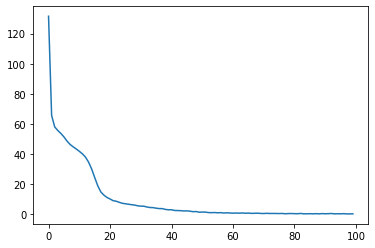

In [19]:
import seaborn as sbn
loss= model.history.history["loss"]
sbn.lineplot(x=range(len(loss)), y=loss)

In [20]:
kayipVerisi = pd.DataFrame(model.history.history)

In [21]:
kayipVerisi.head()

,loss,val_loss
0,131.561111,72.714470
1,65.719933,60.125656
2,58.103401,56.529167
3,55.728455,54.888844
4,53.764706,52.752602


<AxesSubplot:>

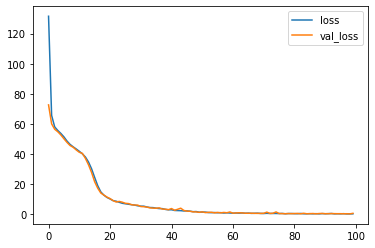

In [22]:
kayipVerisi.plot()

In [23]:
trainLoss= model.evaluate(x_train, y_train, verbose=0)
trainLoss

0.6477393507957458

In [24]:
testLoss = model.evaluate(x_test, y_test, verbose=0)
testLoss

0.7233232259750366

In [25]:
testTahminleri = model.predict(x_test)
testTahminleri

array([[14.940257 ],
       [ 6.8223104],
       [38.5489   ],
       ...,
       [ 9.1763315],
       [ 8.542488 ],
       [15.898066 ]], dtype=float32)

In [26]:
tahminDF = pd.DataFrame(y_test.values, columns=["Gerçek Y"])

In [27]:
tahminDF

,Gerçek Y
0,14.76
1,6.19
2,38.22
3,9.84
4,7.64
...,...
75077,8.95
75078,8.86
75079,9.00
75080,8.00


In [28]:
testTahminleri = pd.Series(testTahminleri.reshape(75082,))

In [29]:
testTahminleri

0        14.940257
1         6.822310
2        38.548901
3         9.417547
4         7.430227
           ...    
75077     8.820461
75078     8.886594
75079     9.176332
75080     8.542488
75081    15.898066
Length: 75082, dtype: float32

In [30]:
tahminDF = pd.concat([tahminDF, testTahminleri], axis=1)
tahminDF.columns = ["Gerçek Y", "Tahmin Y"]

In [31]:
tahminDF.head(50)

,Gerçek Y,Tahmin Y
0,14.76,14.940257
1,6.19,6.822310
2,38.22,38.548901
3,9.84,9.417547
4,7.64,7.430227
5,27.07,26.411455
6,20.08,21.422878
7,19.69,19.215029
8,12.82,13.308520
9,19.25,18.982992


<AxesSubplot:xlabel='Gerçek Y', ylabel='Tahmin Y'>

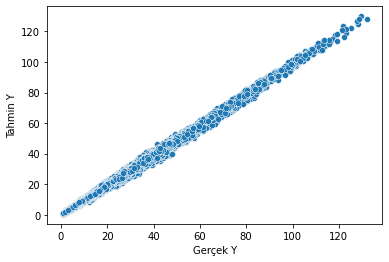

In [32]:
sbn.scatterplot(x="Gerçek Y", y="Tahmin Y", data=tahminDF)

In [33]:
from sklearn.metrics import mean_absolute_error, mean_squared_error


In [34]:
train_data.describe()

,ürün besin değeri,ürün fiyatı,Yıl,Ay,Gün
count,227520.000000,227520.000000,227520.000000,227520.00000,227520.0
mean,143.113924,16.348622,2018.000000,6.50000,1.0
std,133.218871,13.260935,1.414217,3.45206,0.0
min,8.000000,0.730000,2016.000000,1.00000,1.0
25%,41.000000,7.330000,2017.000000,3.75000,1.0
50%,83.000000,12.600000,2018.000000,6.50000,1.0
75%,250.000000,20.900000,2019.000000,9.25000,1.0
max,402.000000,141.330000,2020.000000,12.00000,1.0


In [35]:
mean_absolute_error(tahminDF["Gerçek Y"], tahminDF["Tahmin Y"])

0.5450919879632646

In [36]:
mean_squared_error(tahminDF["Gerçek Y"], tahminDF["Tahmin Y"])

0.7233237177115031

In [37]:
numerikVeri

,et,kuruyemiş,meyve,sebze ve bakliyat,süt ürünlei ve kahvaltılık,tahıl ve ürünleri,ürün,ürün besin değeri,üYeri,marketB,...,sehirA,sehirB,sehirC,sehirD,sehirE,sehirF,sehirG,sehirH,Yıl,Ay
0,1.0,0.0,0.0,0.0,0.0,0.0,65,120,1,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2016,1
1,1.0,0.0,0.0,0.0,0.0,0.0,70,103,1,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2016,1
2,1.0,0.0,0.0,0.0,0.0,0.0,61,160,1,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2016,1
3,0.0,0.0,0.0,1.0,0.0,0.0,1,354,1,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2016,1
4,0.0,0.0,0.0,1.0,0.0,0.0,2,72,1,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2016,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227515,0.0,1.0,0.0,0.0,0.0,0.0,59,110,0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2020,12
227516,0.0,1.0,0.0,0.0,0.0,0.0,60,115,0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2020,12
227517,0.0,1.0,0.0,0.0,0.0,0.0,62,100,0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2020,12
227518,0.0,1.0,0.0,0.0,0.0,0.0,55,110,0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2020,12


In [38]:
yeni_urun=[[1, 0, 0, 0, 0, 0, 65, 120, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 2021, 1]]
yeni_urun = scaler.transform(yeni_urun)
model.predict(yeni_urun)

array([[113.7236]], dtype=float32)